# 1. A description of the problem and a discussion of the background
### The problem I want to work on is "If someone is looking to open a cafe, where would I recommend in New York City? ".
### Questions to consider:
### Place the cafe where there are a lot of existing cafes or in a place where there is none 
### Or find some kind of balance between these two extremes?A description of the problem and a discussion of the background

# 2. A description of the data and how it will be used to solve the problem
### For the problem I will: 
### 1) find the high rating cafe in NY and identify them visually on a map;
### 2) create several "clusters" of these cafes to identfiy potential districts  to choose from. He should choose one from these business district and locate his cafe in the center of it. The closer to the center, the high will be the rent. This is another choise that will be made by  referring to his budget.


In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [8]:
CLIENT_ID = 'RWSBGCOWNQDVOPB53PJ0DIIPSJE3MAUS5A0R50ISP4GPPYYL' # your Foursquare ID
CLIENT_SECRET = 'OLG0LOCKSXMCMJEB24ZGNF0EKLA0YXJN1KNEFHO4L20PVUJL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 99
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RWSBGCOWNQDVOPB53PJ0DIIPSJE3MAUS5A0R50ISP4GPPYYL
CLIENT_SECRET:OLG0LOCKSXMCMJEB24ZGNF0EKLA0YXJN1KNEFHO4L20PVUJL


In [9]:
address = '102 North End Ave, New York, NY'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


40.7149555 -74.0153365


In [10]:
search_query = 'coffee'
radius = 5000
print(search_query + ' .... OK!')

coffee .... OK!


In [11]:

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=RWSBGCOWNQDVOPB53PJ0DIIPSJE3MAUS5A0R50ISP4GPPYYL&client_secret=OLG0LOCKSXMCMJEB24ZGNF0EKLA0YXJN1KNEFHO4L20PVUJL&ll=40.7149555,-74.0153365&v=20180605&query=coffee&radius=5000&limit=99'

In [12]:
results = requests.get(url).json()
# results

In [13]:
# assign relevant part of JSON to venues
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 28 columns):
reasons.count                          99 non-null int64
reasons.items                          99 non-null object
referralId                             99 non-null object
venue.categories                       99 non-null object
venue.delivery.id                      26 non-null object
venue.delivery.provider.icon.name      26 non-null object
venue.delivery.provider.icon.prefix    26 non-null object
venue.delivery.provider.icon.sizes     26 non-null object
venue.delivery.provider.name           26 non-null object
venue.delivery.url                     26 non-null object
venue.id                               99 non-null object
venue.location.address                 99 non-null object
venue.location.cc                      99 non-null object
venue.location.city                    99 non-null object
venue.location.country                 99 non-null object
venue.location.crossStreet  

In [14]:
df=pd.DataFrame()
df['venue_ID']=dataframe['venue.id']
df['name']=dataframe['venue.name']
df['lat']=dataframe['venue.location.lat']
df['lng']=dataframe['venue.location.lng']
df.head()

,venue_ID,name,lat,lng
0,57210afa498ecfbb8c1be6cc,Le District Coffee,40.713284,-74.015854
1,5171b5cc011cef9833bbb787,Mulberry & Vine,40.715177,-74.010227
2,49ccd495f964a52091591fe3,Kaffe 1668,40.715045,-74.011509
3,4ea0afbf9adf1e334e4cc0e6,Laughing Man Coffee & Tea,40.717394,-74.010103
4,56093809498e5344ab8835a6,The Wooly Daily,40.712137,-74.008395


In [15]:

# Show the cafes on the map
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=13)

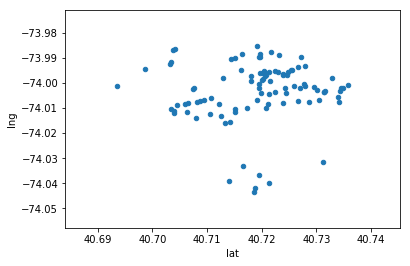

In [16]:
# Cluster these Cafes based on their geographic locations

from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # plotting library


%matplotlib inline

df.plot(x='lat',y='lng',kind='scatter')

In [17]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
df_array=np.array(df[['lat','lng']])
k_means.fit(df_array)
k_labels=pd.DataFrame(k_means.labels_)
k_labels.info()
df['cluster']=k_labels
df.groupby('cluster').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 1 columns):
0    99 non-null int32
dtypes: int32(1)
memory usage: 476.0 bytes


,venue_ID,name,lat,lng
cluster,,,,
0,28,28,28,28
1,7,7,7,7
2,40,40,40,40
3,24,24,24,24


In [18]:
# add markers to map

for lat, lng, name,venue_ID,cluster in zip(df['lat'], df['lng'], df['name'],df['venue_ID'],df['cluster']):
    
    if cluster == 0:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    if cluster == 1:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    if cluster == 2:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    if cluster == 3:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='purple',
            fill=True,
            fill_color='purple',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    
map_newyork

In [20]:
# Generate the recommended location for the four cluster using the mean of the locations

center_location=df.groupby('cluster').mean()
center_location

,lat,lng
cluster,,
0,40.728073,-74.003966
1,40.719991,-74.037936
2,40.719201,-73.993981
3,40.708224,-74.008681


In [21]:
# color_list=['blue','red','green','purple']
# Add recommended location on the map
i=0
for lat, lng in zip(center_location['lat'],center_location['lng']):
    folium.Marker([lat,lng], popup='Recommend for Group '+ str(i)).add_to(map_newyork)
    i=i+1
map_newyork

# IV. Results
#### I use the dataset to create four clusters, as show in the following notebook. The geographic average of this location is marked and recommended the location for opening the business.This solution is based purely on the geographic location, which is quite good in most cases. Since in the business of cafe, the right location is almost THE important decision to make. Nevertheless, if we could find more information on each cluster,it will improve the solution further.

# VI.Conclusion
#### The clustering is very useful and intuitive to solve the problem related to geographic data. We should also pay attention to the outcomes of the clustering, especially when it yields a result different ideas of a 'business circle' in a city. It have two potential reasons. One is that the clustering is simply wrong. But more likely, the result may present a new business opportunity. In the later case, we should examine the features we included in the model to find the cause of the result. If we can identify the reason that cause the clustering, it might be a valuable business insight that we